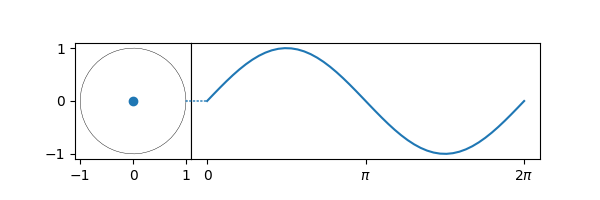

In [ ]:
# %matplotlib widget
# %matplotlib ipympl

# from operator import itemgetter
# from enum import Enum
# import numpy as np
# from matplotlib import pyplot as plt
# from matplotlib.animation import FuncAnimation
# import ipywidgets as widgets
# from ipywidgets import Box, FloatSlider, HBox, interactive_output, Label, Layout, Output, ToggleButtons, VBox
# from IPython.display import clear_output




'''
Dependency injection, some functional programming principles.
'''
'''
Import widgets directly
Set initial values based upon state
'''

'''
class SliderProp(Enum):
    DESCRIPTION = 'description'
    VALUE = 'value'
    MIN = 'min'
    MAX = 'max'
    STEP = 'step'

class ToggleButtonOption(Enum):
    SINE = 'sine'
    COSINE = 'cosine'

class WaveProp(Enum):
    TRIG_FUNCTION = 'trig_function'
    PHASE_SHIFT = 'phase_shift'
    VERTICAL_SHIFT = 'vertical_shift'
    HORIZONTAL_SCALAR = 'horizontal_scalar'
    VERTICAL_SCALAR = 'vertical_scalar'

def calculate_trig_values(fnc):
    def fn(options):
        phase_shift, vertical_shift, horizontal_scalar, vertical_scalar = itemgetter(
            WaveProp.PHASE_SHIFT,
            WaveProp.VERTICAL_SHIFT,
            WaveProp.HORIZONTAL_SCALAR,
            WaveProp.VERTICAL_SCALAR
            )(options)
        
        def gn(x):
            return vertical_scalar * fnc(horizontal_scalar * (x - phase_shift)) + vertical_shift
        return gn
    return fn

def update_wave_plot(plt):
    def fn(fncs):
        base_fnc, modified_fnc = fncs

        y = [base_fnc(x) for x in xs]
        y_modified = [modified_fnc(x) for x in xs]
        
        fig, ax = plt.subplots()
        # fig.set_layout_engine('tight')
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False

        fig.suptitle("")
        ax.axis('square')
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.grid(True)
        ax.plot(xs, y, 'k--')
        ax.plot(xs, y_modified, 'b')

        return fig
    return fn


def update_circle_plot(plt):
    def fn(fncs, label):
        vertical_scalar = 2
        horizontal_scalar = 2

        base_fnc, modified_fnc = fncs

        t = np.linspace(0, 2 * np.pi, 100)
        tx = np.cos(t)
        ty = np.sin(t)

        fig, ax = plt.subplots()
        # fig.set_layout_engine('tight')
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False

        Rtx = vertical_scalar * horizontal_scalar * np.cos(t)
        Rty = vertical_scalar * horizontal_scalar * np.sin(t)

        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.axis('square')
        ax.grid(True)
        ax.set_yticklabels([])
        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)
        ax.plot(tx, ty, 'k--', label=label)
        ax.plot(Rtx, Rty, 'b', label=f"Modified {label}")
        ax.legend()

        return fig
    return fn


def update_plots(out):
    def fn(xs):
        def gn(trig_function, phase_shift, vertical_shift, horizontal_scalar, vertical_scalar):
            if trig_function == ToggleButtonOption.COSINE:
                base_fnc = np.cos
                trig_label = 'Cosine'
            else:
                base_fnc = np.sin
                trig_label = 'Sine'

            modified_fnc = calculate_trig_values(base_fnc)({
                WaveProp.PHASE_SHIFT: phase_shift,
                WaveProp.VERTICAL_SHIFT: vertical_shift,
                WaveProp.HORIZONTAL_SCALAR: horizontal_scalar,
                WaveProp.VERTICAL_SCALAR: vertical_scalar,
            })
            
            with out:
                out.clear_output()
                plt.ioff()

                fncs = [base_fnc, modified_fnc]
                wave_fig = update_wave_plot(plt)(fncs)
                circle_fig = update_circle_plot(plt)(fncs, trig_label)

                plt.subplots_adjust(wspace=0, hspace=0)
                display(Box(
                    children=[wave_fig.canvas, circle_fig.canvas],
                    layout=Layout(
                        display='flex',
                        flex_direction='row',
                        justify_content='center',
                        # align_items='stretch',
                        width='100%',
                        flex_gap=0,
                        margin='0',
                        padding='0'
                    )))
        return gn
    return fn


def update_label(label):
    def fn(change):
        value = change['new']
        label.value = f"{value:.1f}"
    return fn


def define_slider(options):
    description, value, min, max, step = itemgetter(
        SliderProp.DESCRIPTION,
        SliderProp.VALUE,
        SliderProp.MIN,
        SliderProp.MAX,
        SliderProp.STEP,
    )(options)

    slider = FloatSlider(
        value=value,
        min=min,
        max=max,
        step=0.1,
        orientation='horizontal',
        readout=False,
        continuous_update=False
    )

    label = Label(description)
    label.layout.width = '8rem'
    
    label_value = Label(f"{value:.1f}")
    label_value.layout.width = '3rem'
    label_value.layout.margin = '2px 0 0 1rem'
    label_value.layout.justify_content = 'flex-end'

    label_min = Label(f"{min:.1f}")
    label_min.style.text_color = 'gray'

    label_max = Label(f"{max:.1f}")
    label_max.style.text_color = 'gray'

    slider.observe(update_label(label_value), names="value")

    slider_container = HBox([label_min, slider, label_max])
    slider_container.layout.justify_content = 'center'
    container = HBox([label, slider_container, label_value])
    container.layout.justify_content = 'space-between'

    return {'container': container, 'slider': slider}

def define_ui(out, xs):
    # Supply values as ToggleButtonOption.
    toggle_buttons = ToggleButtons(options=["Sine", "Cosine"])
    toggle_buttons_container = Box(
        children=[toggle_buttons],
        layout=Layout(margin='0 0 1rem 0')
    )

    slider1_layout = define_slider({
        SliderProp.DESCRIPTION: "Phase",
        SliderProp.VALUE: 0,
        SliderProp.MIN: -5,
        SliderProp.MAX: 5,
        SliderProp.STEP: 0.01
    })
    slider2_layout = define_slider({
        SliderProp.DESCRIPTION: "Vertical Shift",
        SliderProp.VALUE: 0,
        SliderProp.MIN: -5,
        SliderProp.MAX: 5,
        SliderProp.STEP: 0.01
    })
    slider3_layout = define_slider({
        SliderProp.DESCRIPTION: "Horizontal Scalar",
        SliderProp.VALUE: 0,
        SliderProp.MIN: -5,
        SliderProp.MAX: 5,
        SliderProp.STEP: 0.01
    })
    slider4_layout = define_slider({
        SliderProp.DESCRIPTION: "Vertical Shift",
        SliderProp.VALUE: 0,
        SliderProp.MIN: -5,
        SliderProp.MAX: 5,
        SliderProp.STEP: 0.01
    })

    interactive_output(update_plots(out)(xs), {
        "trig_function": toggle_buttons,
        "phase_shift": slider1_layout['slider'],
        "vertical_shift": slider2_layout['slider'],
        "horizontal_scalar": slider3_layout['slider'],
        "vertical_scalar": slider4_layout['slider']
    })

    bottom_column = VBox(children=[
        slider1_layout['container'],
        slider2_layout['container'],
        slider3_layout['container'],
        slider4_layout['container'],
    ])
    bottom_column.layout = Layout(
        padding='0.5rem',
        border='1px solid lightgray',
        width='fit-content'
    )

    layout = Layout(
        display='flex',
        flex_flow='column',
        align_items='stretch'
    )
    main_container = Box(children=[toggle_buttons_container, bottom_column], layout=layout)

    return main_container


# Proper range
xs = np.linspace(-np.pi, 4 * np.pi, 100)

plt.style.use('seaborn-v0_8-bright')
out = Output()
ui = define_ui(out, xs)

display(VBox([ui, out]))
'''

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
# axl.plot(np.cos(x) * 0.5, np.sin(x) * 0.5, "k.", lw=0.3)
point, = axl.plot(0, 0, "o")

# draw full curve to set view limits in right Axes
sine, = axr.plot(x, np.sin(x))

# draw connecting line between both graphs
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig.add_artist(con)


def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con


ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    blit=False,  # blitting can't be used with Figure artists
    frames=x,
    repeat_delay=100,
)

plt.show()

